In [1]:
import gzip
import os
import numpy as np

# Pfad erstellen, wo die Daten liegen
# os.path.join baut einen Pfad mit "/"
train_data = os.path.join("data", "train-images-idx3-ubyte.gz")
train_labels = os.path.join("data", "train-labels-idx1-ubyte.gz")

test_data = os.path.join("data", "t10k-images-idx3-ubyte.gz")
test_labels = os.path.join("data", "t10k-labels-idx1-ubyte.gz")

In [2]:
# Funktion zum öffnen von Bildern
def mnist_images(filename):
    with gzip.open(filename, "rb") as file:
       data = np.frombuffer(file.read(), np.uint8, offset = 16)
       # -1 bedeutet in der ersten Dimension alle Einträge in unserem Fall 6000
       # 28,28 bedeutet immer die 28x28 Pixel ausgeben (Zeilen und Spalten) 
       return data.reshape(-1, 28, 28)/255

    
def mnist_labels(filename):
    with gzip.open(filename, "rb") as file:
        return np.frombuffer(file.read(), np.uint8, offset = 8)
        
X_train = mnist_images(train_data)
Y_train = mnist_labels(train_labels)

X_test = mnist_images(test_data)
Y_test = mnist_labels(test_labels)


In [3]:
# gibt den zweiten Eintrag in der ersten Dimension aus mit 28x28
X_train[1].shape

(28, 28)

3
AxesImage(54,36;334.8x217.44)


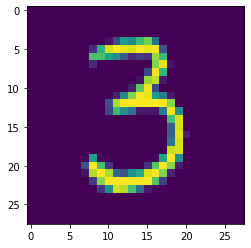

In [4]:
# Bilder ausgeben

%matplotlib inline

import matplotlib.pyplot as plt
print(Y_train[50])
print(plt.imshow(X_train[50]))

In [5]:
# X_train[50]

In [6]:
# lineare Regression erwartet alles in einer Zeiler hintereinander
print(X_train.reshape(-1,784))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train.reshape(-1, 784), Y_train)


/Users/blertaduraku/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/blertaduraku/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
model.score(X_test.reshape(-1, 784), Y_test)

0.9203

In [9]:
# limitieren auf 1000 Datensätze
# Parameter anpassen
# model = LogisticRegression(solver = "sage", n_jobs = 4)
# model.fit(X_train.reshape(-1, 784)[:10000, :], Y_train[:10000, :])

In [10]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train.reshape(-1, 784), Y_train)


print(model.score(X_test.reshape(-1, 784), Y_test))

0.9688
